In [36]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

In [51]:
path = '../src/logs/shake26_2x32d_cifar10_0/'
path = os.path.join(path,'logs.pkl')        
logs = pickle.load(open(path, "rb"))

In [52]:
def visualize_logs(logs):
    plt.plot(logs['train_loss'],label = 'train')
    plt.plot(logs['valid_loss'],label = 'valid')
    plt.yscale('log')
    plt.title("LOSS")
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    plt.plot(logs['train_top1'][10:],label = 'train')
    plt.plot(logs['valid_top1'][10:],label = 'valid')
    plt.yscale('log')
    plt.title("Accuracy")
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    print("Epoch:",np.argmax(logs['valid_top1']))
    print("VALIDATION TOP1 ACC:",np.max(logs['valid_top1']))
    
    epochs = len(logs['policies'])
    mags = []
    for epoch in range(epochs):
        ops = []
        _mags = []
        _policy = np.concatenate(logs['policies'][epoch])
        for i in range(len(_policy)):
            
            ops.append(_policy[i][0][0])
            ops.append(_policy[i][1][0])
            _mags.append(int(float(_policy[i][0][1])*9))
            _mags.append(int(float(_policy[i][1][1])*9))
        
        for j in range(10):
            if epoch == 0:
                mags.append([(np.array(_mags) == j).sum()])
            else:
                mags[j].append((np.array(_mags) == j).sum())
        
    bars = []
    ind = np.arange(epochs)
    colors = ['black','dimgray','gray','darkgray','silver','lightgray','gainsboro','whitesmoke','snow','pink']
    labels = ['9','8','7','6','5','4','3','2','1','0']
    plt.stackplot(ind,*mags[::-1],colors = colors, labels = labels)
    plt.legend()
    plt.show()
#     plt.legend((p2[0], p1[0]), ('Upper', 'Bottom'))
        
#     print(ops)
#     print(mags)

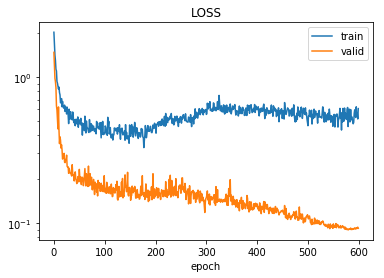

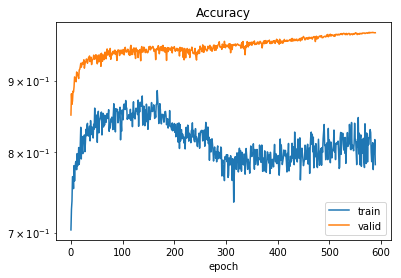

Epoch: 587
VALIDATION TOP1 ACC: 0.9749


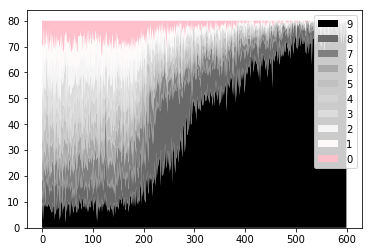

In [53]:
visualize_logs(logs)

In [54]:
logs['policies'][-1]

[[[('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('ShearY', 1.0), ('TranslateY', 1.0)],
  [('Equalize', 0.8888888888888888), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)]],
 [[('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('ShearY', 1.0), ('TranslateY', 1.0)],
  [('Contrast', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)]],
 [[('ShearY', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('Rotate', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)]],
 [[('AutoContrast', 1.0), ('TranslateY', 1.0)],
  [('Brightness', 0.6666666666666666), ('TranslateY', 1.0)],
  [('Color', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('Equalize', 0.0), ('TranslateY', 1.0)]],
 [[('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('Invert', 1.0), ('Tra